In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from datetime import datetime, timedelta

from sklearn.metrics import mean_squared_error

#### data import

In [2]:
data = pd.read_csv("./data/samsung.csv")
data=data[['Date','Close']]
data.columns=['ds','y']
data=data.set_index('ds')
data.head()

,y
ds,
2017-01-17,36960.0
2017-01-18,36940.0
2017-01-19,37480.0
2017-01-20,37200.0
2017-01-23,38060.0


In [3]:
data.tail()

,y
ds,
2020-01-13,60000.0
2020-01-14,60000.0
2020-01-15,59000.0
2020-01-16,60700.0
2020-01-17,61200.0


### 데이터 정리하기

#### train, test set 나누기

In [4]:
start_date_train = '2018-01-01'
end_date_train = '2019-10-31'
start_date_test = '2019-11-01'
end_date_test = '2020-01-17'

#### 휴일 정리

In [5]:
train_holiday  = ['2018-01-01','2018-01-06','2018-01-07','2018-01-13','2018-01-14','2018-01-20','2018-01-21','2018-01-27',
           '2018-01-28','2018-02-03','2018-02-04','2018-02-10','2018-02-11','2018-02-15','2018-02-16','2018-02-17',
           '2018-02-18','2018-02-24','2018-02-25','2018-03-01','2018-03-03','2018-03-04','2018-03-10','2018-03-11',
           '2018-03-17','2018-03-18','2018-03-24','2018-03-25','2018-03-31','2018-04-01','2018-04-07','2018-04-08',
           '2018-04-14','2018-04-15','2018-04-21','2018-04-22','2018-04-28','2018-04-29','2018-05-05','2018-05-06',
           '2018-05-07','2018-05-12','2018-05-13','2018-05-19','2018-05-20','2018-05-22','2018-05-26','2018-05-27',
           '2018-06-02','2018-06-03','2018-06-06','2018-06-09','2018-06-10','2018-06-13','2018-06-16','2018-06-17',
           '2018-06-23','2018-06-24','2018-06-30','2018-07-01','2018-07-07','2018-07-08','2018-07-14','2018-07-15',
           '2018-07-21','2018-07-22','2018-07-28','2018-07-29','2018-08-04','2018-08-05','2018-08-12','2018-08-15',
           '2018-08-18','2018-08-19','2018-08-25','2018-08-26','2018-09-01','2018-09-02','2018-09-08','2018-09-09',
           '2018-09-15','2018-09-16','2018-09-22','2018-09-23','2018-09-24','2018-09-25','2018-09-29','2018-09-30',
           '2018-10-03','2018-10-06','2018-10-07','2018-10-09','2018-10-13','2018-10-14','2018-10-20','2018-10-21',
           '2018-10-27','2018-10-28','2018-11-03','2018-11-04','2018-11-10','2018-11-11','2018-11-17','2018-11-18',
           '2018-11-24','2018-11-25','2018-12-01','2018-12-02','2018-12-08','2018-12-09','2018-12-15','2018-12-16',
           '2018-12-22','2018-12-23','2018-12-25','2018-12-29','2018-12-30',
           
           '2019-01-01','2019-01-05','2019-01-06','2019-01-12','2019-01-13','2019-01-19','2019-01-20','2019-01-26',
           '2019-01-27','2019-02-02','2019-02-03','2019-02-04','2019-02-05','2019-02-06','2019-02-09','2019-02-10',
           '2019-02-16','2019-02-17','2019-02-23','2019-02-24','2019-03-01','2019-03-02','2019-03-03','2019-03-09',
           '2019-03-10','2019-03-16','2019-03-17','2019-03-23','2019-03-24','2019-03-30','2019-03-31','2019-04-06',
           '2019-04-07','2019-04-13','2019-04-14','2019-04-20','2019-04-21','2019-04-27','2019-04-28','2019-05-04',
           '2019-05-05','2019-05-06','2019-05-11','2019-05-12','2019-05-18','2019-05-19','2019-05-25','2019-05-26',
           '2019-06-01','2019-06-02','2019-06-06','2019-06-08','2019-06-09','2019-06-15','2019-06-16','2019-06-22',
           '2019-06-23','2019-06-29','2019-06-30','2019-07-06','2019-07-07','2019-07-13','2019-07-14','2019-07-20',
           '2019-07-21','2019-07-27','2019-07-28','2019-08-03','2019-08-04','2019-08-10','2019-08-11','2019-08-15',
           '2019-08-17','2019-08-18','2019-08-24','2019-08-25','2019-08-31','2019-09-01','2019-09-07','2019-09-08',
           '2019-09-12','2019-09-13','2019-09-14','2019-09-15','2019-09-21','2019-09-22','2019-09-28','2019-09-29',
           '2019-10-03','2019-10-05','2019-10-06','2019-10-09','2019-10-12','2019-10-13','2019-10-19','2019-10-20',
           '2019-10-26','2019-10-27']
           
           
test_holiday=['2019-11-02','2019-11-03','2019-11-09','2019-11-10','2019-11-16','2019-11-17',
           '2019-11-23','2019-11-24','2019-11-30','2019-12-01','2019-12-07','2019-12-08',
           '2019-12-14','2019-12-15','2019-12-21','2019-12-22','2019-12-25','2019-12-28',
           '2019-12-29','2020-01-01','2020-01-04','2020-01-05','2020-01-11','2020-01-12']

In [6]:
data_train=data.loc[start_date_train:end_date_train ,: ]
data_test=data.loc[start_date_test:,:]

In [7]:
print(data_train.shape)
data_train.head()

(449, 1)


,y
ds,
2018-01-02,NaN
2018-01-03,51620.0
2018-01-04,51080.0
2018-01-05,52120.0
2018-01-08,52020.0


In [8]:
print(data_test.shape)
data_test.tail()

(53, 1)


,y
ds,
2020-01-13,60000.0
2020-01-14,60000.0
2020-01-15,59000.0
2020-01-16,60700.0
2020-01-17,61200.0


In [9]:
# data 나누기 위해서 인덱스 설정했으므로 다시 변경해주기
data_train=data_train.reset_index()
data_test=data_test.reset_index()

### 모델 만들기

#### 예측값의 상한과 하한을 제어

In [10]:
data_train['cap'] = 70000
data_test['floor'] = 30000

#### 객체 생성하고 Fit

In [11]:
holiday = pd.DataFrame({
    'holiday': train_holiday,
    'ds': pd.to_datetime([x for x in train_holiday]),
    'lower_window': 0,
    'upper_window': 0,
    })

In [12]:
holiday

,holiday,ds,lower_window,upper_window
0,2018-01-01,2018-01-01,0,0
1,2018-01-06,2018-01-06,0,0
2,2018-01-07,2018-01-07,0,0
3,2018-01-13,2018-01-13,0,0
4,2018-01-14,2018-01-14,0,0
...,...,...,...,...
210,2019-10-13,2019-10-13,0,0
211,2019-10-19,2019-10-19,0,0
212,2019-10-20,2019-10-20,0,0
213,2019-10-26,2019-10-26,0,0


In [13]:
m = Prophet(growth='logistic',holidays=holiday ,yearly_seasonality=True, changepoint_range=0.9,
           daily_seasonality=True)
forecast = m.fit(data_train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


#### 미래 Dataframe 생성

In [14]:
future = m.make_future_dataframe(periods=78)
future.head()

future=future.set_index('ds')
future_train=future.loc[start_date_train : end_date_train, : ]
future_test=future.loc[start_date_test: , :]

future_train=future_train.reset_index()
future_test=future_test.reset_index()

In [15]:
future.tail()

""
ds
2020-01-13
2020-01-14
2020-01-15
2020-01-16
2020-01-17


In [16]:
start_date = datetime.strptime(start_date_test, '%Y-%m-%d') #시작 날짜
end_date = datetime.strptime(end_date_test, '%Y-%m-%d') #끝 날짜

test_total_date = [] 

while start_date.strftime('%Y-%m-%d') != end_date.strftime('%Y-%m-%d'):
    test_total_date.append(start_date.strftime('%Y-%m-%d')) 
    start_date += timedelta(days=1)


test_holiday_date=test_holiday    #마찬가지로 주말, 공휴일 제거 추후 추가

In [17]:
final_date = list(set(test_total_date) - set(test_holiday_date))
future_test=future_test[future_test['ds'].isin(final_date)]
future=pd.concat([future_train,future_test],ignore_index=True)

future['cap'] = 70000
future['floor'] = 30000

#### 예측하기

In [18]:
forecast = m.predict(future)  
forecast.head()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,2018-01-01,2018-01-01_lower,2018-01-01_upper,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-02,38508.721543,70000,43555.860210,47594.946532,38508.721543,38508.721543,0.0,0.0,0.0,...,489.353694,489.353694,489.353694,-3171.769160,-3171.769160,-3171.769160,0.0,0.0,0.0,45591.687751
1,2018-01-03,38508.272867,70000,43645.598548,47718.993012,38508.272867,38508.272867,0.0,0.0,0.0,...,474.001457,474.001457,474.001457,-2940.193859,-2940.193859,-2940.193859,0.0,0.0,0.0,45807.462139
2,2018-01-04,38507.824189,70000,44104.777494,48045.059339,38507.824189,38507.824189,0.0,0.0,0.0,...,589.546275,589.546275,589.546275,-2707.235318,-2707.235318,-2707.235318,0.0,0.0,0.0,46155.516821
3,2018-01-05,38507.375510,70000,44381.459182,48456.574594,38507.375510,38507.375510,0.0,0.0,0.0,...,479.455111,479.455111,479.455111,-2475.126731,-2475.126731,-2475.126731,0.0,0.0,0.0,46277.085565
4,2018-01-08,38506.029466,70000,44830.717970,49021.414169,38506.029466,38506.029466,0.0,0.0,0.0,...,408.988886,408.988886,408.988886,-1803.651467,-1803.651467,-1803.651467,0.0,0.0,0.0,46876.748560


In [19]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-02,45591.687751,43555.860210,47594.946532
1,2018-01-03,45807.462139,43645.598548,47718.993012
2,2018-01-04,46155.516821,44104.777494,48045.059339
3,2018-01-05,46277.085565,44381.459182,48456.574594
4,2018-01-08,46876.748560,44830.717970,49021.414169
...,...,...,...,...
497,2020-01-10,50656.322781,48503.076158,52665.173658
498,2020-01-13,51257.382164,49345.759433,53183.874980
499,2020-01-14,51539.600797,49641.720886,53671.564245
500,2020-01-15,51714.792236,49645.576975,53827.246901


In [20]:
forecast.head()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,2018-01-01,2018-01-01_lower,2018-01-01_upper,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-02,38508.721543,70000,43555.860210,47594.946532,38508.721543,38508.721543,0.0,0.0,0.0,...,489.353694,489.353694,489.353694,-3171.769160,-3171.769160,-3171.769160,0.0,0.0,0.0,45591.687751
1,2018-01-03,38508.272867,70000,43645.598548,47718.993012,38508.272867,38508.272867,0.0,0.0,0.0,...,474.001457,474.001457,474.001457,-2940.193859,-2940.193859,-2940.193859,0.0,0.0,0.0,45807.462139
2,2018-01-04,38507.824189,70000,44104.777494,48045.059339,38507.824189,38507.824189,0.0,0.0,0.0,...,589.546275,589.546275,589.546275,-2707.235318,-2707.235318,-2707.235318,0.0,0.0,0.0,46155.516821
3,2018-01-05,38507.375510,70000,44381.459182,48456.574594,38507.375510,38507.375510,0.0,0.0,0.0,...,479.455111,479.455111,479.455111,-2475.126731,-2475.126731,-2475.126731,0.0,0.0,0.0,46277.085565
4,2018-01-08,38506.029466,70000,44830.717970,49021.414169,38506.029466,38506.029466,0.0,0.0,0.0,...,408.988886,408.988886,408.988886,-1803.651467,-1803.651467,-1803.651467,0.0,0.0,0.0,46876.748560


In [21]:
forecast.tail()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,2018-01-01,2018-01-01_lower,2018-01-01_upper,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
497,2020-01-10,41903.463748,70000,48503.076158,52665.173658,41615.529182,42194.093044,0.0,0.0,0.0,...,479.455111,479.455111,479.455111,-1491.977753,-1491.977753,-1491.977753,0.0,0.0,0.0,50656.322781
498,2020-01-13,42018.568109,70000,49345.759433,53183.874980,41706.924370,42333.592980,0.0,0.0,0.0,...,408.988886,408.988886,408.988886,-935.556505,-935.556505,-935.556505,0.0,0.0,0.0,51257.382164
499,2020-01-14,42056.901243,70000,49641.720886,53671.564245,41737.358666,42380.629631,0.0,0.0,0.0,...,489.353694,489.353694,489.353694,-772.035814,-772.035814,-772.035814,0.0,0.0,0.0,51539.600797
500,2020-01-15,42095.216738,70000,49645.576975,53827.246901,41770.403870,42423.206154,0.0,0.0,0.0,...,474.001457,474.001457,474.001457,-619.807634,-619.807634,-619.807634,0.0,0.0,0.0,51714.792236
501,2020-01-16,42133.514506,70000,50116.368823,54064.184599,41804.815998,42464.741819,0.0,0.0,0.0,...,589.546275,589.546275,589.546275,-478.738937,-478.738937,-478.738937,0.0,0.0,0.0,52009.703520


#### 그림으로 표현 

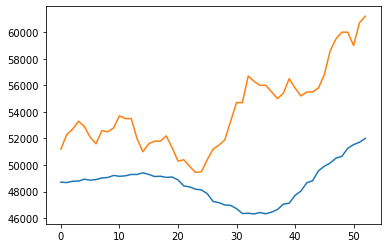

In [22]:
pred=forecast[-len(data_test):].reset_index()

plt.plot(pred['yhat'])
plt.plot(data_test['y'])
plt.show()

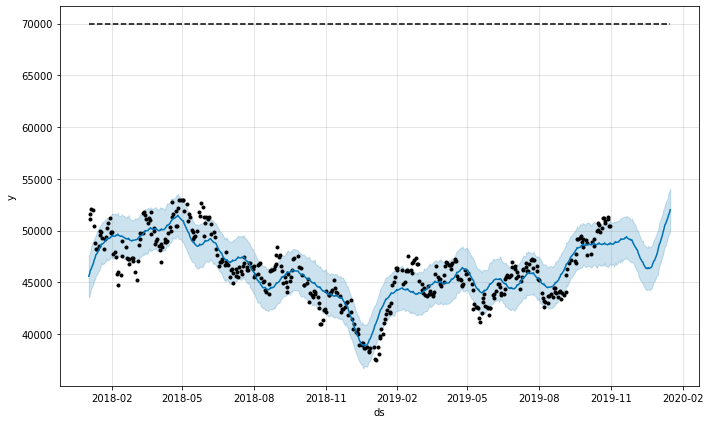

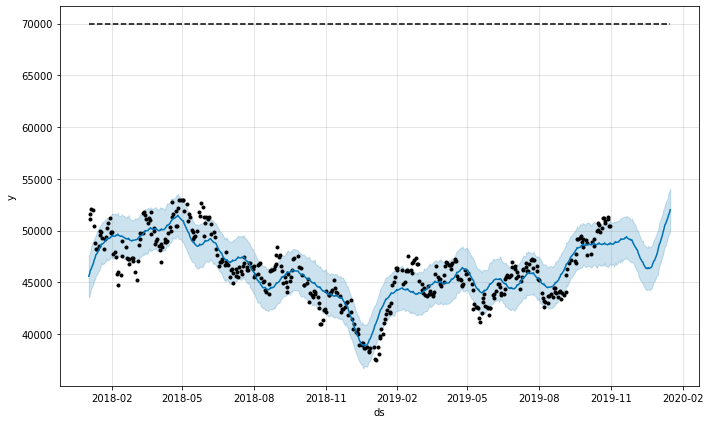

In [23]:
m.plot(forecast) # 2개가 나오는 이유를 모르겠다.

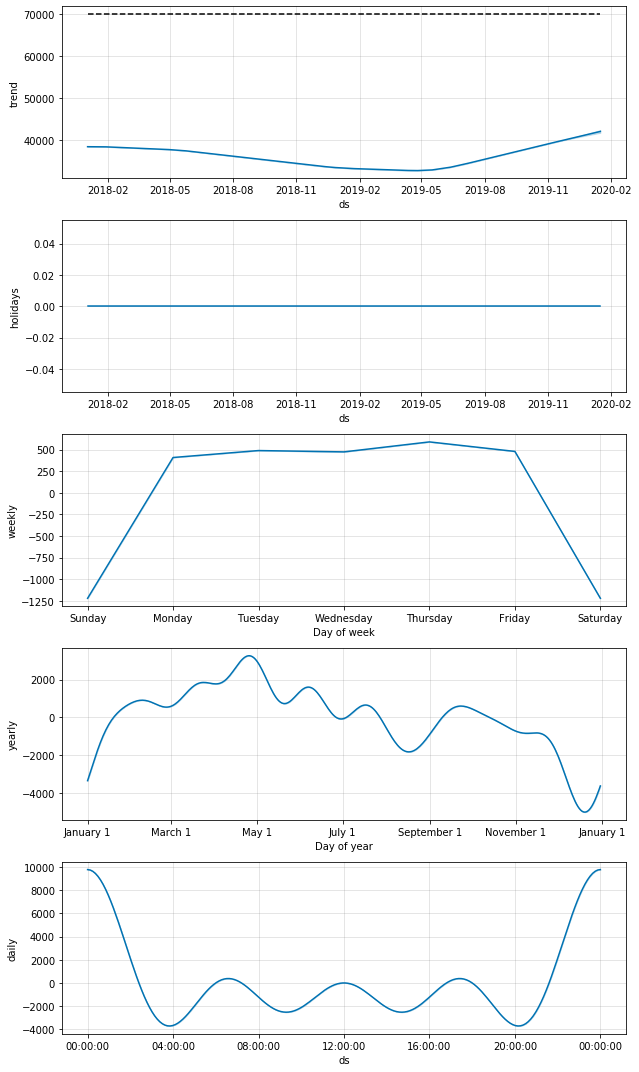

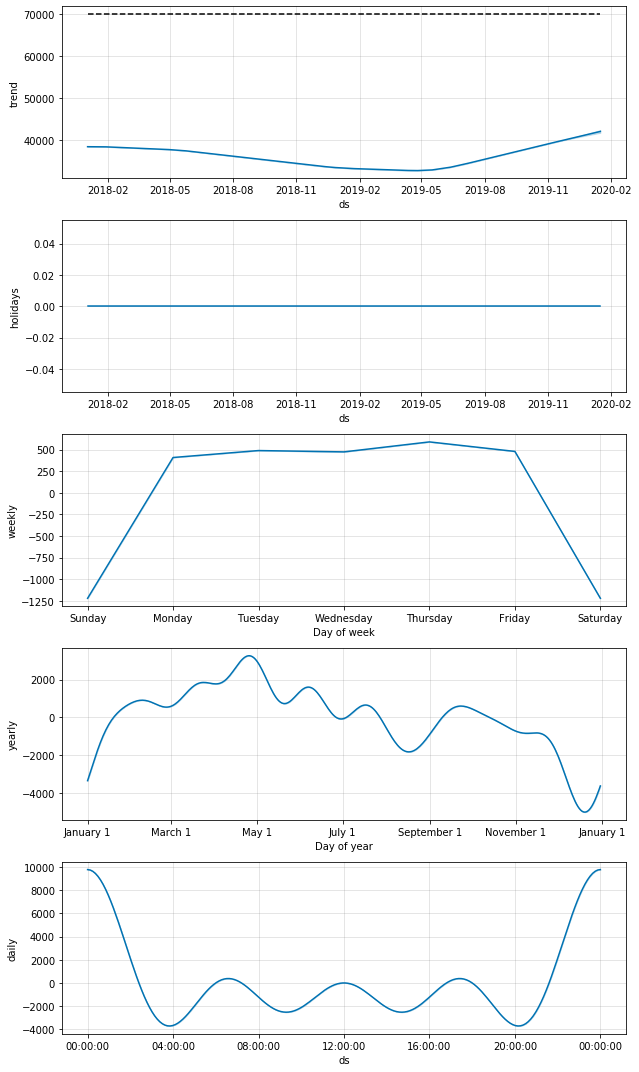

In [24]:
m.plot_components(forecast) # 2개가 나오는 이유를 모르겠다.